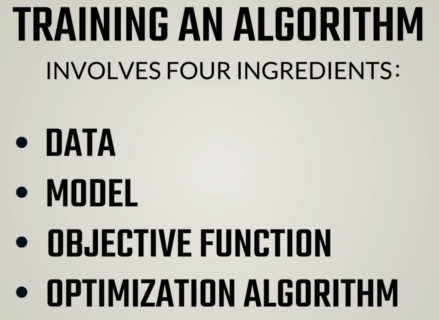

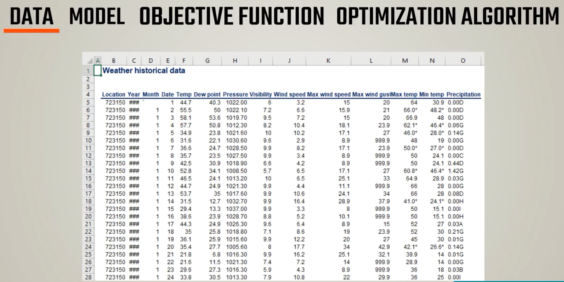 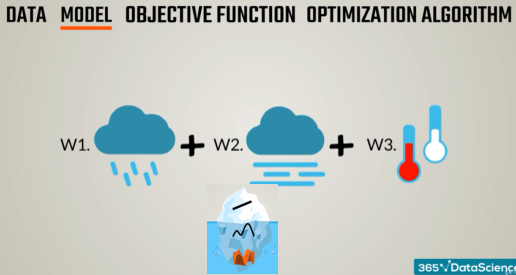 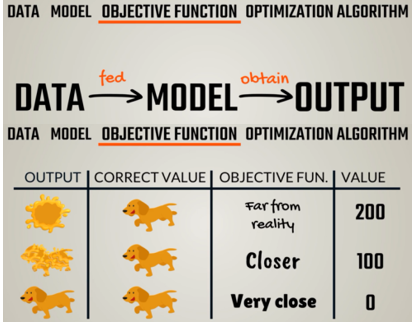 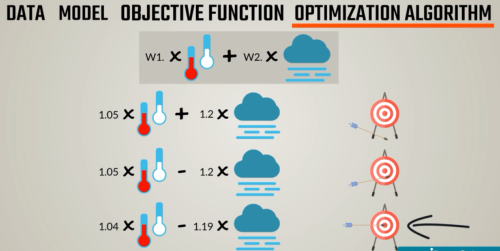 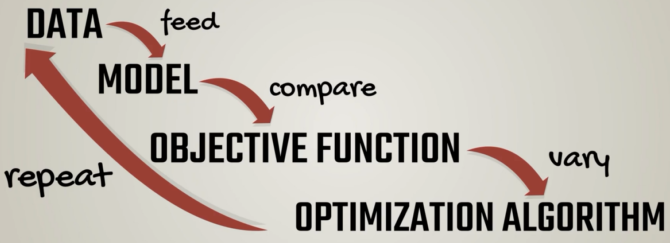


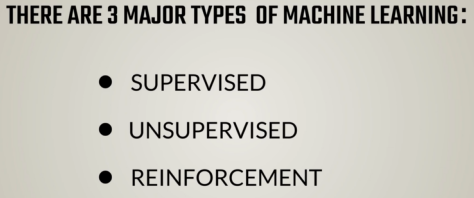
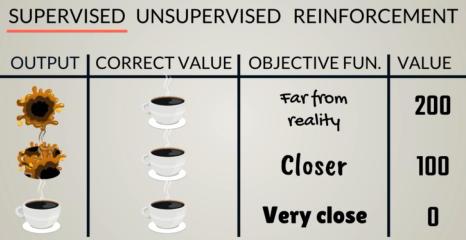
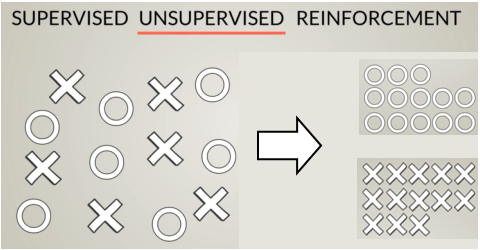
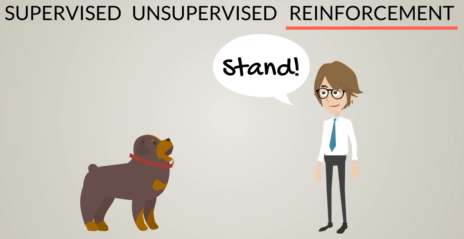

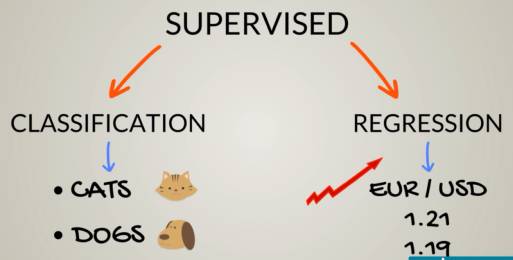


2. Model


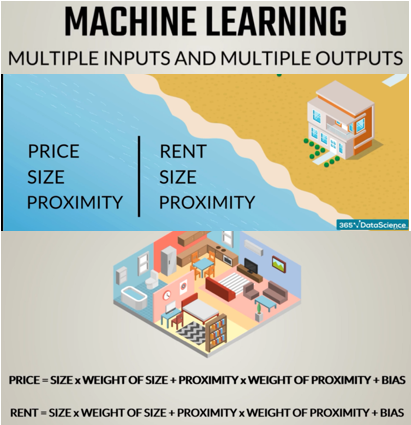

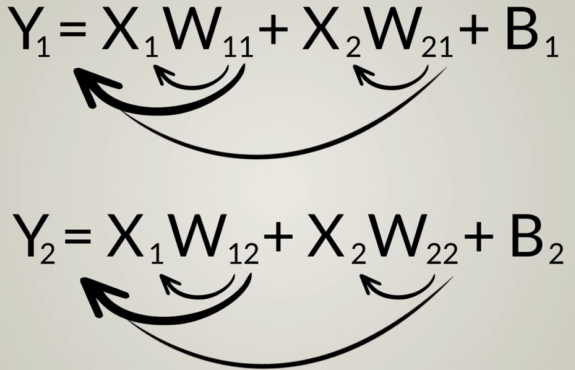
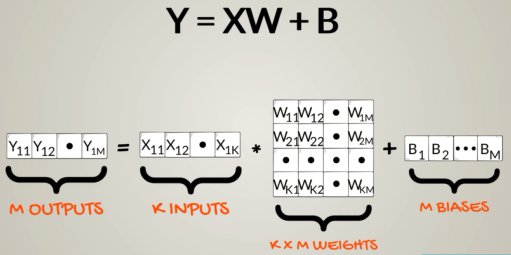
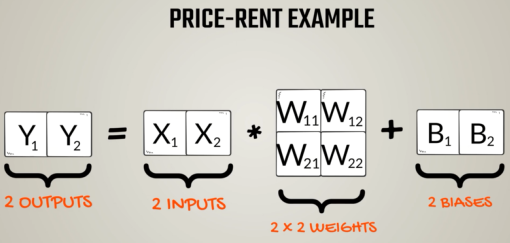
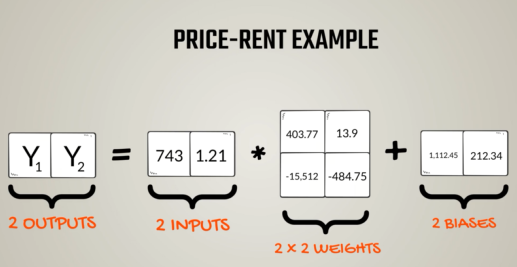
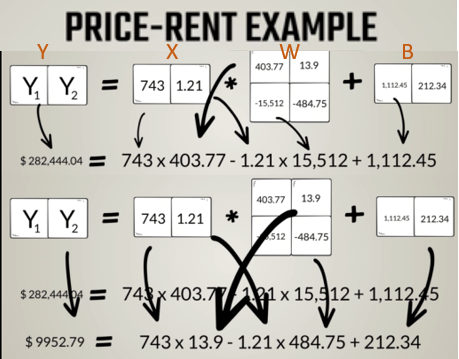
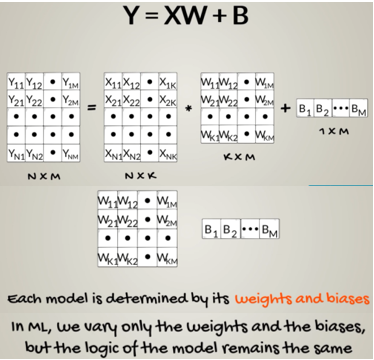


3. Objective Function

- Loss/Cost/Error Function ; Supervised Learning
- - N2-Norms or OLS ; Regression
- - Cross-Entropy ; Classification
- Reward Function ; Reinforcement Learning


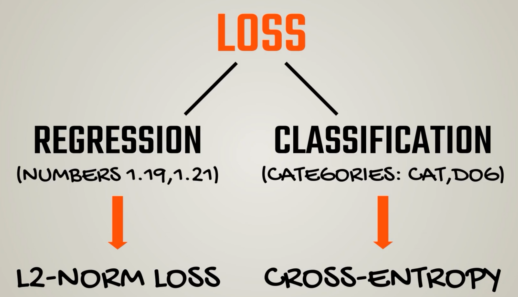

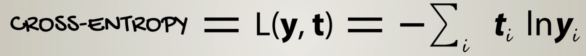

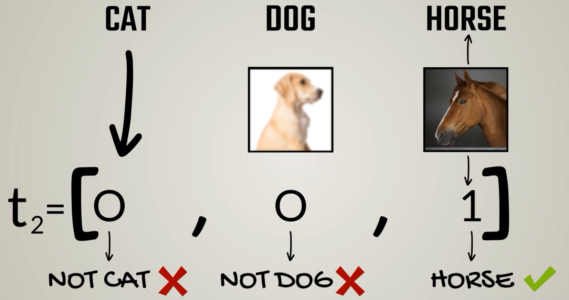

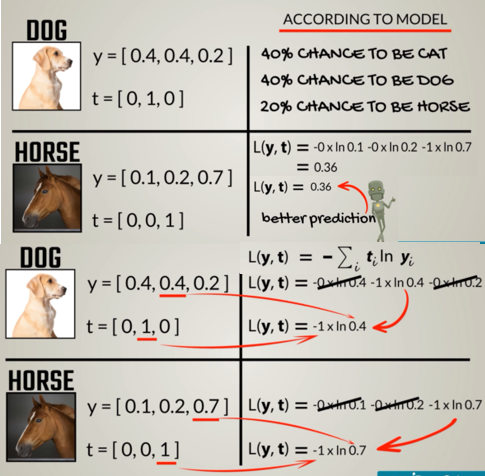


4. Optimization Function


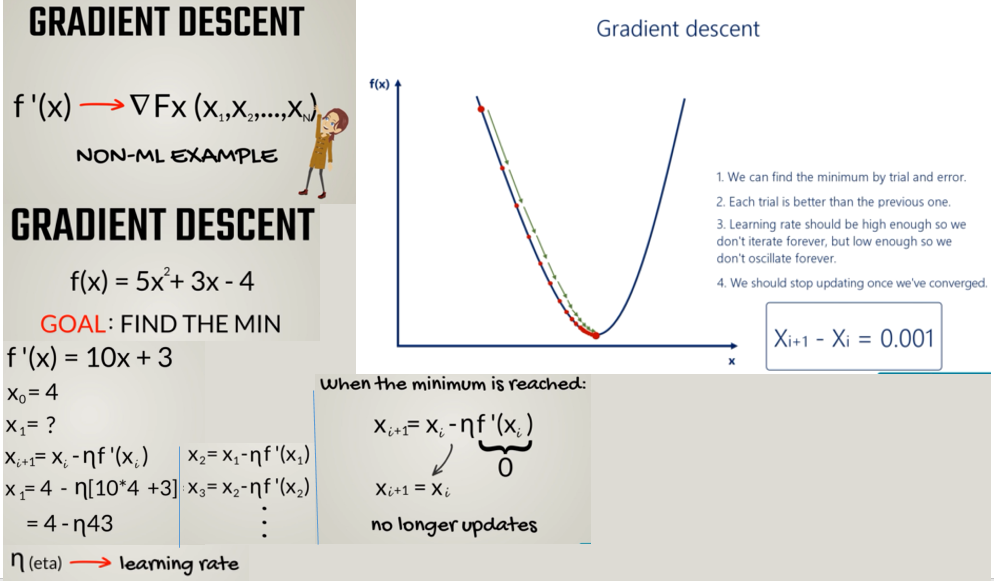

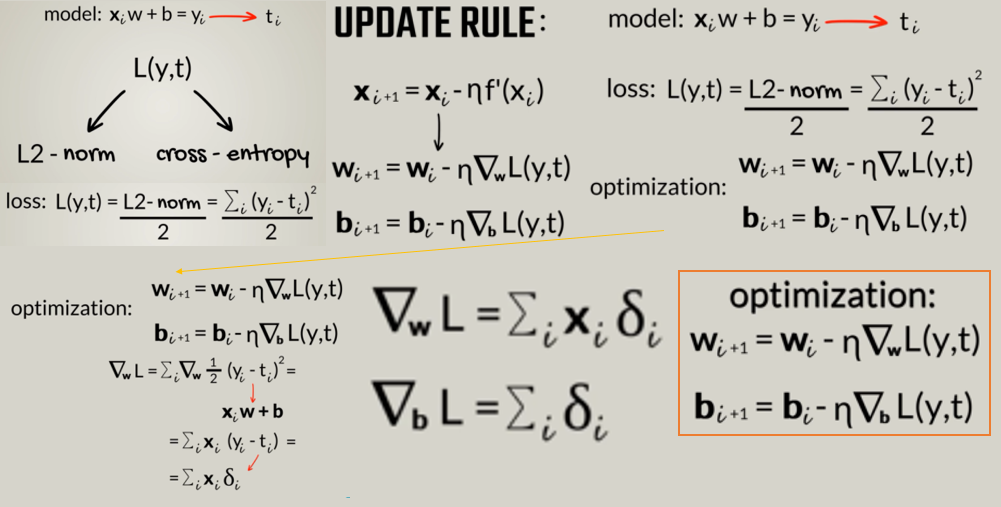


## 1. Basic NN Example


1. Simple Linear Regression. Minimal example


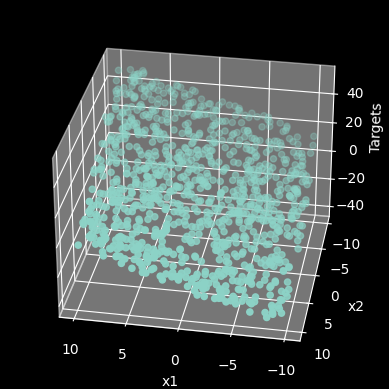

[[ 2.00012123]
 [-3.00190677]] [[4.99160585]]


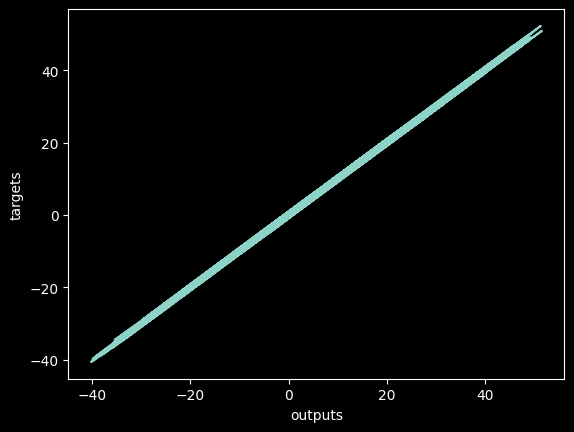

In [17]:
# https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html

# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

###DATA###
# 1.Generate random input data to train on
observations = 1000
x1 = np.random.uniform(low=-10, high=10, size=(observations, 1))
x2 = np.random.uniform(low=-10, high=10, size=(observations, 1))

inputs = np.column_stack((x1, x2))
# print(inputs)

# 2.Create the targets we will aim at
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2 * x1 - 3 * x2 + 5 + noise

# print(targets)

# 3.plotin data train data
targets = targets.reshape(observations, 1)
fig = plt.figure()
axis = fig.add_subplot(111, projection="3d")
# axis.plot(x1,x2,targets)
axis.scatter(x1, x2, targets)
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_zlabel("Targets")
axis.view_init(azim=100)
plt.show()

# 4.Initialize variables
# as we have 2 input so 2 weight is needed, and the shape of the weight should be (2,1)
# and the bias should be the shape of (1,1)
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2, 1))
biases = np.random.uniform(-init_range, init_range, size=(1, 1))

# print(weights)
# print(biases)

# 5. Set a learning rate
learning_rate = 0.02

# 6. Train the model
# as out model is a regression model we will use N2-Norm (or OLS) as a loss function.
# predict = dot_product(input,weights) + biases
# delta = outputs - targets

for i in range(500):
    ###MODEL###
    # predicted output
    outputs = np.dot(inputs, weights) + biases
    # diff of real and predicted
    deltas = outputs - targets

    ###OBJECTIVE FUNCTION###
    # loss = sum(outputs - targets)^2/2 got scaled loss dividing by number of observation
    loss = (np.sum(deltas**2) / 2) / observations
    # print the loss
    # print(loss)
    # taking the delta_scaled by dividing the delta by the number of observation
    deltas_scaled = deltas / observations

    ###OPTIMIZATION ALGORITHM###
    ## Optimizing the weights and biases
    # i) updating the weights using gradient descent
    # and take the Transpose of inputs to be able to perform dot product with deltas_scaled, now the form of the below equn is (2x1) (2x1) scaler (2x1)
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    # ii) updating the biases using gradient descent
    biases = biases - learning_rate * np.sum(deltas_scaled)

## 7. Print the final optimized weights and biases
print(weights, biases)

## 8. Plot last output vs targets
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()